In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import parallel_coordinates

from os import listdir


In [2]:
# Variables
x_train_file = "X_train.txt"
y_train_file = "y_train.txt"
path_to_data = "UCI HAR Dataset" 
path_to_training_data = "/".join([path_to_data, "train"])

features_file = "features.txt"


In [3]:
# Load data into numpy arrays
X_train_np = np.loadtxt(path_to_training_data + "/" + x_train_file)
y_train_np = np.loadtxt(path_to_training_data + "/" + y_train_file)

# Load features list
features_df = pd.read_csv(path_to_data + "/" + features_file, sep = " ", index_col=0, header=None) 
features_df.columns = ["names"]

# Convert to pandas data frame
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.DataFrame(y_train_np)

# Label Columns
#X_train_df.columns = list(features_df.names.values)
y_train_df.columns = ["labels"]

In [4]:
X_train_df.head()

0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9      ...          551       552       553  \
0 -0.983185 -0.923527 -0.934724    ...    -0.074323 -0.298676 -0.710304   
1 -0.974914 -0.957686 -0.943068    ...     0.158075 -0.595051 -0.861499   
2 -0.963668 -0.977469 -0.938692    ...     0.414503 -0.390748 -0.760104   
3 -0.982750 -0.989302 -0.938692    ...     0.404573 -0.117290 -0.482845   
4 -0.979672 -0.990441 -0.942469    ...     0.087753 -0.351471 -0.699205   

        554       555       556       557       558       559       560  
0 -0.112754  0.030400 -0.464761 -0.018446 -0.841247  0.179941 -0.058627  
1  0.053477 -0.007435 -0.732626  0.703511 -0.844788  0.180289 -0.054317  
2 -0.118559  0.177899  0.100699  0.808529 -0.848933  0.180637 -0.049118  
3 -0.036788 -0.012892  0.640011 -0.485366 -0.848649  0.181935 -0.047663  
4  0.123320  0.122542  0.693578 -0.615971 -0.847865  0.185151 -0.043892  

[5 rows x 561 columns]

In [5]:
y_train_df.head()

labels
0     5.0
1     5.0
2     5.0
3     5.0
4     5.0

In [6]:
X_train_df.describe()

0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604   
std       0.418687     0.424073     0.485942     0.414122     0.544547   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.980233    -0.993591    -0.978162    -0.980251    -0.936219   
50%      -0.859365    -0.950709    -0.857328    -0.857143    -0.881637   
75%      -0.262415    -0.292680    -0.066701    -0.265671    -0.017129   
max       1.000000     1.000000     0.967664     1.000000     1.000000   

          ...               551          552          553          554  \
count     ...       7352.000000  7352.000000  7352.000000  7352.000000   
mean      ...          0.125293    -0.307009    -0.625294     0.008684   
std       ...          0.250994     0.321011     0.307584     0.336787   
min       ...         -1.000000    -0.995357    -0.999765    -0.976580   
25%       ...         -0.023692    -0.542602    -0.845573    -0.121527   
50%       ...          0.134000    -0.343685    -0.711692     0.009509   
75%       ...          0.289096    -0.126979    -0.503878     0.150865   
max       ...          0.946700     0.989538     0.956845     1.000000   

               555          556          557          558          559  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.002186     0.008726    -0.005981    -0.489547     0.058593   
std       0.448306     0.608303     0.477975     0.511807     0.297480   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.289549    -0.482273    -0.376341    -0.812065    -0.017885   
50%       0.008943     0.008735    -0.000368    -0.709417     0.182071   
75%       0.292861     0.506187     0.359368    -0.509079     0.248353   
max       1.000000     0.998702     0.996078     1.000000     0.478157   

               560  
count  7352.000000  
mean     -0.056515  
std       0.279122  
min      -1.000000  
25%      -0.143414  
50%       0.003181  
75%       0.107659  
max       1.000000  

[8 rows x 561 columns]

In [116]:
y_train_df.describe()

labels
count  7352.000000
mean      3.643362
std       1.744802
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       6.000000

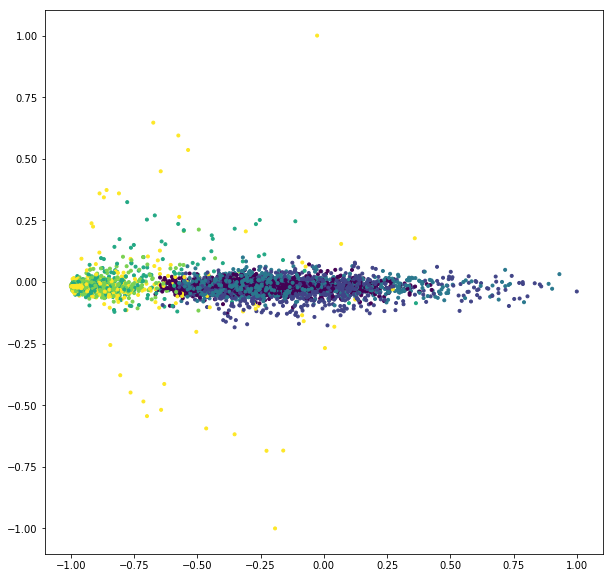

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_df[5], X_train_df[1], c=y_train_df["labels"], marker='.')
plt.show()

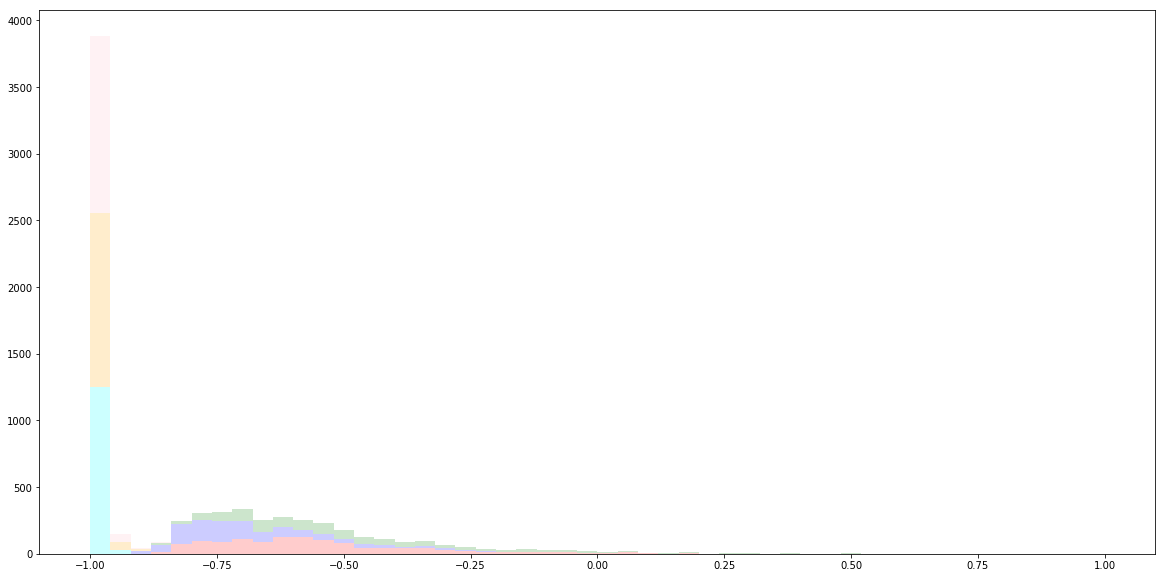

In [15]:
feature = 180
selection = [X_train_df[feature][y_train_df["labels"] == i] for i in range(1,7)]

plt.figure(figsize=(20,10))
_ = plt.hist(selection, bins=50, histtype='bar', color=['red', 'blue', 'green', 'cyan', 'orange', 'pink'], stacked=True, fill=True, alpha = 0.2)
plt.show()

In [113]:
def bhatta( hist1,  hist2):
    return np.sum(np.sqrt(hist1[0]*hist2[0]))

def similarity(classA, classB, feature):
    bins = np.linspace(-1,1,30)
    hist1 = plt.hist(X_train_df[feature][y_train_df["labels"] == classA], bins=bins, density=True)
    hist2 = plt.hist(X_train_df[feature][y_train_df["labels"] == classB], bins=bins, density=True)
    plt.clf()
    return bhatta( hist1,  hist2)

    

In [136]:
results = []
for A in range(1,6):
    for B in range(A+1,6):
        score = []
        for feature in range(0, len(features_df.names)):
            score.append((feature, similarity(A, B, feature)))
        score = sorted(score, key=lambda x: x[1])
        results.append((A, B, score))
        print("Classes {0} and {1} are best separated by {2} ({3})".format(A, B, features_df.names[score[0][0]], score[0][0]))

Classes 1 and 2 are best separated by tGravityAcc-arCoeff()-X,4 (69)
Classes 1 and 3 are best separated by fBodyAccMag-mean() (503)
Classes 1 and 4 are best separated by tBodyAccJerk-mean()-Z (83)
Classes 1 and 5 are best separated by tBodyAcc-mean()-Z (3)
Classes 2 and 3 are best separated by fBodyAccMag-sma() (508)
Classes 2 and 4 are best separated by fBodyAcc-std()-Z (271)
Classes 2 and 5 are best separated by tBodyAcc-mean()-Z (3)
Classes 3 and 4 are best separated by tBodyAcc-mean()-Z (3)
Classes 3 and 5 are best separated by tBodyAcc-mean()-Z (3)
Classes 4 and 5 are best separated by tGravityAcc-mean()-X (41)


<Figure size 432x288 with 0 Axes>

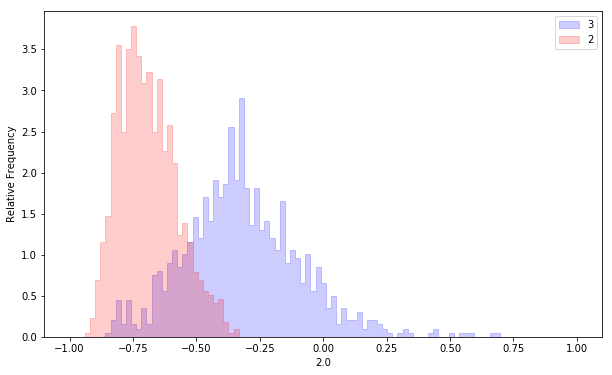

In [166]:
sep_features = [69,503,83, 3, 508, 271, 3, 3, 3, 41]

plt.figure(figsize=(10,6))

select = 4

classA = results[select][0]
classB = results[select][1]
feature = results[select][2][0][0]

selection = [X_train_df[feature][y_train_df["labels"] == i] for i in [classA, classB]]
_ = plt.hist(selection, histtype='step', bins=np.linspace(-1,1,100),color=['red', 'blue'], density=True, fill=True, alpha = 0.2, label=[classA, classB])

plt.legend()
plt.xlabel(y_train_df["labels"][feature])
plt.ylabel("Relative Frequency")
plt.show()

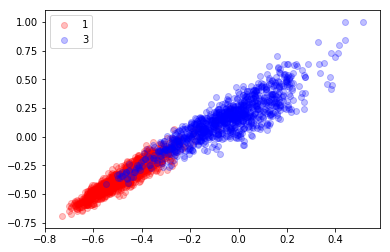

In [220]:
select = 1
classA = results[select][0]
classB = results[select][1]
feature1 = results[select][2][0][0]
feature2 = results[select][2][1][0]

mask = y_train_df["labels"] == classA
selection1 = X_train_df[feature1][mask]
selection2 = X_train_df[feature2][mask]
plt.scatter(selection1, selection2, c="red", alpha = 0.25, label=classA)

mask = y_train_df["labels"] == classB
selection1 = X_train_df[feature1][mask]
selection2 = X_train_df[feature2][mask]
plt.scatter(selection1, selection2, c="blue", alpha = 0.25, label=classB)
plt.legend()

In [196]:
y_train_df.head()

labels
0     5.0
1     5.0
2     5.0
3     5.0
4     5.0